In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import cv2
from lib.reader import *
from lib.helpers import *
from lib.imports import *
from lib.filters import *
from lib.visualize import *
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
import sys
sys.path.append('M:\\Betrieb_ISF\\Gruppe_A_Orga\\Arbeitsgebiete\\Python_Auswerteskripte')
import imports as imp

In [3]:
#dfaußen_1=imp.dic2df(r'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021',False)

In [4]:
#display(dfaußen_1.index)

Index(['D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_0.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_2.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_3.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_4.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_5.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_6.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_7.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_8.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1581.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1582.hdf5',
       'D:\ost\DAP Data\002_nach_au

In [19]:
dfmeander=imp.dic2df(r'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001',False)
#dfinnen_1=imp.dic2df(r'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001',False)
#dfaußen=imp.dic2df(r'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001',False)
dfaußen_2=imp.dic2df(r'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001',False)
dfinnen=imp.dic2df(r'D:\ost\DAP Data\001_nach_innen',False)
#dfmeander_1=imp.dic2df(r'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003',False)

display(dfmeander,dfaußen_2, dfinnen)

group                                                                                     coordinates  \
dataset                                                                        contour_thickness_mask   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                                                               ...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

group                                                                                                  \
dataset                                                                                  coordinate_x   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\003_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\D

group                                                                                     coordinates  \
dataset                                                                        contour_thickness_mask   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[135, 110, 23, 240, 140, 82, 100, 190, 75, 89...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                                                               ...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

group                                                                                                  \
dataset                                                                                  coordinate_x   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\004_nach_innen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\D

group                                                                                     coordinates  \
dataset                                                                        contour_thickness_mask   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[10, 0, 0, 0, 11, 0, 0, 0, 11, 0, 0, 0, 11, 0...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                                                               ...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[34, 1, 103, 141, 104, 10, 225, 167, 220, 196...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[203, 235, 70, 39, 127, 56, 185, 115, 228, 79...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

group                                                                                                  \
dataset                                                                                  coordinate_x   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\005_nach_außen_2021_hdf5_export...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\D

group                                                                                     coordinates  \
dataset                                                                        contour_thickness_mask   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                                                               ...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

group                                                                                                  \
dataset                                                                                  coordinate_x   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\D

group                                                                                     coordinates  \
dataset                                                                        contour_thickness_mask   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
...                                                                                               ...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...   

group                                                                                                  \
dataset                                                                                  coordinate_x   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

group                                                                                                  \
dataset                                                                              coordinate_x_var   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                                               ...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\DAP Data\006_meander_2021_hdf5_export_00...  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
D:\ost\D

Index(['D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_0.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_2.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_3.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_4.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_5.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_6.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_7.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_8.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1473.hdf5',
       'D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1474.hdf5',
       'D:\ost\DAP Data\003_meander

Index(['D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_0.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_1.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_2.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_3.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_4.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_5.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_6.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_7.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_8.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_1459.hdf5',
       'D:\ost\DAP Data\006_meander_2021_hdf5_export_0003\series_step_1460.hdf5',
       'D:\ost\DAP Data\006_meander

Index(['D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_0.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_1.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_2.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_3.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_4.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_5.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_6.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_7.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_8.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_1516.hdf5',
       'D:\ost\DAP Data\004_nach_innen_2021_hdf5_export_0001\series_step_1517.hdf5',

Index(['D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_0.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_1.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_2.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_3.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_4.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_5.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_6.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_7.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_8.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_1595.hdf5',
       'D:\ost\DAP Data\005_nach_außen_2021_hdf5_export_0001\series_step_1596.hdf5',

Index(['D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_0.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_2.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_3.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_4.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_5.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_6.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_7.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_8.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1489.hdf5',
       'D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1490.hdf5',
       'D:\ost\DAP Data\007_nach_au

Index(['D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_0.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_2.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_3.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_4.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_5.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_6.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_7.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_8.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_9.hdf5',
       ...
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1581.hdf5',
       'D:\ost\DAP Data\002_nach_außen_1_hdf5_export_2021\series_step_1582.hdf5',
       'D:\ost\DAP Data\002_nach_au

## Meander

'D:\\ost\\DAP Data\\003_meander_2021_hdf5_export_0001\\series_step_28.hdf5'

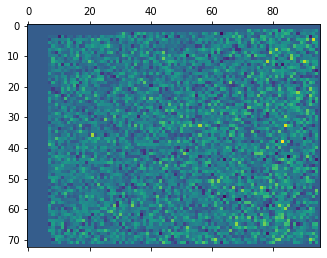

In [47]:
plt.matshow(dfmeander.iloc[28,:][(      'strains',                   'strain_p1')])
display(dfmeander.index[28])
plt.show()

## Innen

'D:\\ost\\DAP Data\\001_nach_innen\\series_step_150.hdf5'

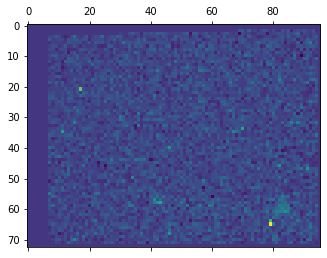

In [44]:
plt.matshow(dfinnen.iloc[150,:][(      'strains',                   'strain_p1')])
display(dfinnen.index[150])
plt.show()

## Außen

'D:\\ost\\DAP Data\\007_nach_außen_1_hdf5_export_0001\\series_step_60.hdf5'

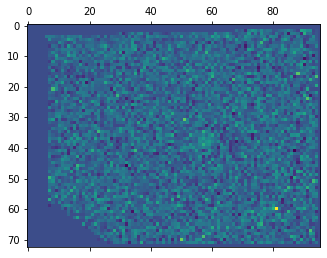

In [41]:
plt.matshow(dfaußen_2.iloc[60,:][(      'strains',                   'strain_p1')])
display(dfaußen_2.index[60])
plt.show()

In [48]:
dfa=dfaußen_2
dfi=dfinnen
dfm=dfmeander

In [49]:
display(dfa.shape,dfi.shape,dfm.shape)

(1499, 64)

(1688, 64)

(1483, 64)

In [51]:
st={'dfi':150,
    'dfa':60,
    'dfm':28
    }

In [52]:
dfa=dfa.iloc[st['dfa']:,:].copy()
dfi=dfi.iloc[st['dfi']:,:].copy()
dfm=dfm.iloc[st['dfm']:,:].copy()

In [53]:
display(dfa.shape,dfi.shape,dfm.shape)

(1439, 64)

(1538, 64)

(1455, 64)

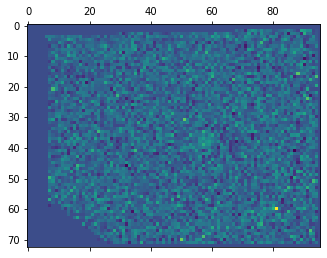

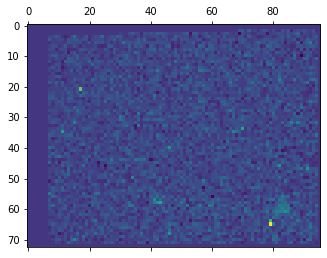

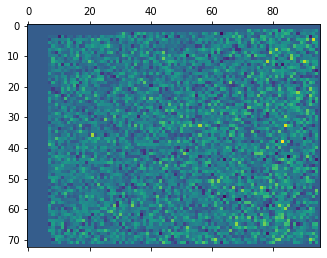

In [55]:
plt.matshow(dfa.iloc[0,:][(      'strains',                   'strain_p1')])
plt.matshow(dfi.iloc[0,:][(      'strains',                   'strain_p1')])
plt.matshow(dfm.iloc[0,:][(      'strains',                   'strain_p1')])

In [56]:
display(dfi.columns)

MultiIndex([(  'coordinates',      'contour_thickness_mask'),
            (  'coordinates',                'coordinate_x'),
            (  'coordinates',            'coordinate_x_var'),
            (  'coordinates',                'coordinate_y'),
            (  'coordinates',            'coordinate_y_var'),
            (  'coordinates',                'coordinate_z'),
            (  'coordinates',            'coordinate_z_var'),
            (  'coordinates',           'distance_to_plane'),
            (  'coordinates',          'distance_to_sphere'),
            (  'coordinates',                        'mask'),
            (  'coordinates',             'variance_sphere'),
            ('displacements',          'displacement_total'),
            ('displacements',     'displacement_total_rbmr'),
            ('displacements', 'displacement_total_rbmr_var'),
            ('displacements',      'displacement_total_var'),
            ('displacements',              'displacement_x'),
        

In [58]:
dfi[('attributes','time_s')]=[i/5 for i in list(range(len(dfi.index)))]
dfa[('attributes','time_s')]=[i/5 for i in list(range(len(dfa.index)))]
dfm[('attributes','time_s')]=[i/5 for i in list(range(len(dfm.index)))]
display(dfm[('attributes','time_s')],dfi[('attributes','time_s')],dfa[('attributes','time_s')])

D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_28.hdf5        0.0
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_29.hdf5        0.2
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_30.hdf5        0.4
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_31.hdf5        0.6
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_32.hdf5        0.8
                                                                           ...  
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1478.hdf5    290.0
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1479.hdf5    290.2
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1480.hdf5    290.4
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1481.hdf5    290.6
D:\ost\DAP Data\003_meander_2021_hdf5_export_0001\series_step_1482.hdf5    290.8
Name: (attributes, time_s), Length: 1455, dtype: float64

D:\ost\DAP Data\001_nach_innen\series_step_150.hdf5       0.0
D:\ost\DAP Data\001_nach_innen\series_step_151.hdf5       0.2
D:\ost\DAP Data\001_nach_innen\series_step_152.hdf5       0.4
D:\ost\DAP Data\001_nach_innen\series_step_153.hdf5       0.6
D:\ost\DAP Data\001_nach_innen\series_step_154.hdf5       0.8
                                                        ...  
D:\ost\DAP Data\001_nach_innen\series_step_1683.hdf5    306.6
D:\ost\DAP Data\001_nach_innen\series_step_1684.hdf5    306.8
D:\ost\DAP Data\001_nach_innen\series_step_1685.hdf5    307.0
D:\ost\DAP Data\001_nach_innen\series_step_1686.hdf5    307.2
D:\ost\DAP Data\001_nach_innen\series_step_1687.hdf5    307.4
Name: (attributes, time_s), Length: 1538, dtype: float64

D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_60.hdf5        0.0
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_61.hdf5        0.2
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_62.hdf5        0.4
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_63.hdf5        0.6
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_64.hdf5        0.8
                                                                           ...  
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1494.hdf5    286.8
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1495.hdf5    287.0
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1496.hdf5    287.2
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1497.hdf5    287.4
D:\ost\DAP Data\007_nach_außen_1_hdf5_export_0001\series_step_1498.hdf5    287.6
Name: (attributes, time_s), Length: 1439, dtype: float64

In [59]:
irav=imp.ravi2df(r'D:\ost\DAP Data\RAVI Export\RAVI\001_nach_innen.ravi',
                 r'D:\ost\DAP Data\RAVI Export\RAVI\Kennlinie-19104059-29-0-250.prn',
                 13.5, False)
display(irav)

viewable  \
time                                                            
0.000000    [[108, 108, 128, 118, 108, 128, 118, 98, 137, ...   
0.074074    [[137, 98, 137, 118, 128, 108, 137, 118, 108, ...   
0.148148    [[143, 112, 153, 133, 143, 122, 92, 133, 153, ...   
0.222222    [[128, 157, 147, 137, 157, 147, 128, 108, 137,...   
0.296296    [[102, 122, 163, 133, 133, 143, 153, 112, 153,...   
...                                                       ...   
310.444444  [[1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,...   
310.518519  [[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,...   
310.592593  [[1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1,...   
310.666667  [[1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
310.740741  [[1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,...   

                                                          raw  \
time                                                            
0.000000    [[-36, -36, -34, -35, -36, -34, -35, -37, -33,...   
0.074074    [[-33, -37, -33, -35, -34, -36, -33, -35, -36,...   
0.148148    [[-34, -37, -33, -35, -34, -36, -39, -35, -33,...   
0.222222    [[-36, -33, -34, -35, -33, -34, -36, -38, -35,...   
0.296296    [[-38, -36, -32, -35, -35, -34, -33, -37, -33,...   
...                                                       ...   
310.444444  [[-27, -29, -26, -26, -24, -29, -30, -27, -28,...   
310.518519  [[-31, -31, -27, -27, -24, -31, -30, -27, -27,...   
310.592593  [[-27, -31, -24, -29, -28, -28, -26, -30, -25,...   
310.666667  [[-27, -30, -26, -28, -24, -31, -28, -30, -29,...   
310.740741  [[-27, -28, -28, -27, -25, -27, -28, -28, -28,...   

                                                     degree_C  
time                                                           
0.000000    [[None, None, None, None, None, None, None, No...  
0.074074    [[None, None, None, None, None, None, None, No...  
0.148148    [[None, None, None, None, None, None, None, No...  
0.222222    [[None, None, None, None, None, None, None, No...  
0.296296    [[None, None, None, None, None, None, None, No...  
...                                                       ...  
310.444444  [[None, None, None, None, None, None, None, No...  
310.518519  [[None, None, None, None, None, None, None, No...  
310.592593  [[None, None, None, None, None, None, None, No...  
310.666667  [[None, None, None, None, None, None, None, No...  
310.740741  [[None, None, None, None, None, None, None, No...  

[4196 rows x 3 columns]

In [70]:
arav=imp.ravi2df(r'D:\ost\DAP Data\RAVI Export\RAVI\002_nach_aussen.ravi',
                 r'D:\ost\DAP Data\RAVI Export\RAVI\Kennlinie-19104059-29-0-250.prn',
                 13.5, False)
mrav=imp.ravi2df(r'D:\ost\DAP Data\RAVI Export\RAVI\003_meander.ravi',
                 r'D:\ost\DAP Data\RAVI Export\RAVI\Kennlinie-19104059-29-0-250.prn',
                 13.5, False)
display(arav,mrav)

viewable  \
time                                                            
0.000000    [[31, 31, 20, 20, 25, 20, 31, 51, 31, 31, 41, ...   
0.074074    [[11, 14, 12, 12, 10, 10, 9, 10, 10, 11, 11, 1...   
0.148148    [[11, 10, 11, 9, 11, 11, 8, 9, 7, 11, 8, 9, 9,...   
0.222222    [[8, 13, 11, 10, 11, 9, 8, 8, 10, 11, 8, 8, 7,...   
0.296296    [[12, 12, 11, 12, 12, 10, 8, 9, 9, 11, 10, 9, ...   
...                                                       ...   
314.444444  [[1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
314.518519  [[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,...   
314.592593  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,...   
314.666667  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...   
314.740741  [[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,...   

                                                          raw  \
time                                                            
0.000000    [[-33, -33, -35, -35, -34, -35, -33, -29, -33,...   
0.074074    [[863, 868, 865, 864, 862, 862, 860, 862, 862,...   
0.148148    [[886, 885, 887, 884, 887, 886, 882, 883, 881,...   
0.222222    [[917, 924, 921, 920, 922, 918, 917, 917, 919,...   
0.296296    [[953, 953, 952, 953, 953, 951, 946, 949, 948,...   
...                                                       ...   
314.444444  [[-29, -27, -28, -24, -28, -28, -27, -28, -26,...   
314.518519  [[-29, -25, -27, -29, -26, -28, -24, -27, -25,...   
314.592593  [[-30, -26, -28, -27, -25, -27, -26, -26, -27,...   
314.666667  [[-28, -26, -25, -27, -28, -24, -26, -28, -27,...   
314.740741  [[-26, -24, -28, -27, -25, -28, -28, -26, -28,...   

                                                     degree_C  
time                                                           
0.000000    [[None, None, None, None, None, None, None, No...  
0.074074    [[None, None, None, None, None, None, None, No...  
0.148148    [[None, None, None, None, None, None, None, No...  
0.222222    [[None, None, None, None, None, None, None, No...  
0.296296    [[None, None, None, None, None, None, None, No...  
...                                                       ...  
314.444444  [[None, None, None, None, None, None, None, No...  
314.518519  [[None, None, None, None, None, None, None, No...  
314.592593  [[None, None, None, None, None, None, None, No...  
314.666667  [[None, None, None, None, None, None, None, No...  
314.740741  [[None, None, None, None, None, None, None, No...  

[4250 rows x 3 columns]

viewable  \
time                                                            
0.000000    [[164, 146, 164, 128, 100, 137, 146, 82, 128, ...   
0.074074    [[132, 123, 113, 142, 132, 113, 123, 132, 132,...   
0.148148    [[118, 109, 128, 73, 118, 128, 91, 109, 118, 1...   
0.222222    [[140, 140, 140, 90, 99, 90, 132, 140, 132, 12...   
0.296296    [[141, 114, 114, 114, 106, 123, 132, 114, 114,...   
...                                                       ...   
292.074074  [[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,...   
292.148148  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,...   
292.222222  [[2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,...   
292.296296  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,...   
292.370370  [[1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,...   

                                                          raw  \
time                                                            
0.000000    [[-26, -28, -26, -30, -33, -29, -28, -35, -30,...   
0.074074    [[-30, -31, -32, -29, -30, -32, -31, -30, -30,...   
0.148148    [[-30, -31, -29, -35, -30, -29, -33, -31, -30,...   
0.222222    [[-28, -28, -28, -34, -33, -34, -29, -28, -29,...   
0.296296    [[-28, -31, -31, -31, -32, -30, -29, -31, -31,...   
...                                                       ...   
292.074074  [[-24, -27, -27, -27, -27, -26, -31, -28, -27,...   
292.148148  [[-24, -26, -26, -28, -24, -26, -26, -24, -28,...   
292.222222  [[-24, -26, -27, -28, -28, -21, -25, -23, -26,...   
292.296296  [[-26, -27, -25, -26, -30, -26, -26, -29, -26,...   
292.370370  [[-25, -25, -25, -23, -29, -28, -26, -24, -29,...   

                                                     degree_C  
time                                                           
0.000000    [[None, None, None, None, None, None, None, No...  
0.074074    [[None, None, None, None, None, None, None, No...  
0.148148    [[None, None, None, None, None, None, None, No...  
0.222222    [[None, None, None, None, None, None, None, No...  
0.296296    [[None, None, None, None, None, None, None, No...  
...                                                       ...  
292.074074  [[None, None, None, None, None, None, None, No...  
292.148148  [[None, None, None, None, None, None, None, No...  
292.222222  [[None, None, None, None, None, None, None, No...  
292.296296  [[None, None, None, None, None, None, None, No...  
292.370370  [[None, None, None, None, None, None, None, No...  

[3948 rows x 3 columns]

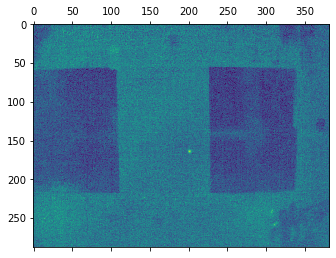

In [69]:
plt.matshow(irav.iloc[181,0][::-1,::-1])


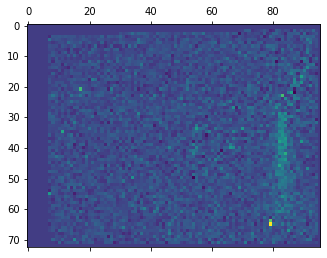

In [65]:
plt.matshow(dfi.iloc[10,:][(      'strains',                   'strain_p1')])

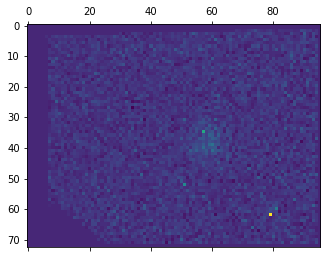

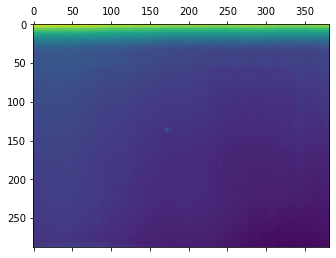

In [71]:
plt.matshow(dfa.iloc[10,:][(      'strains',                   'strain_p1')])
plt.matshow(arav.iloc[163,0][::-1,::-1])

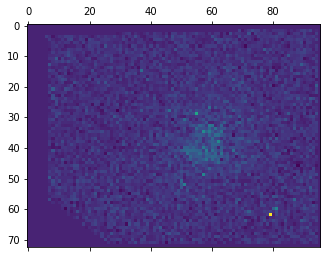

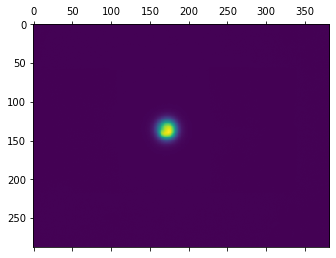

In [72]:
plt.matshow(dfa.iloc[50,:][(      'strains',                   'strain_p1')])
plt.matshow(arav.iloc[300,0][::-1,::-1])

c:\temp\TEMP_U~1/ipykernel_16420/1220179717.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.matshow(arav.iloc[i,0][::-1,::-1])


IndexError: single positional indexer is out-of-bounds

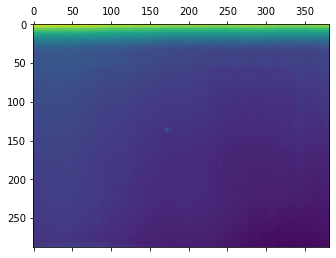

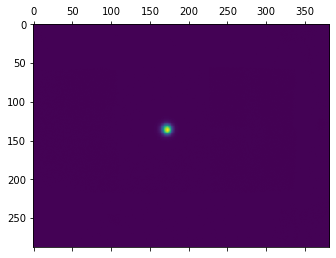

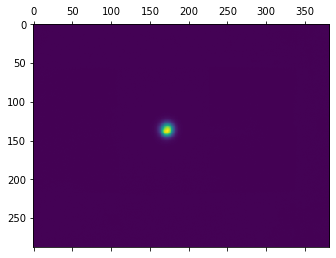

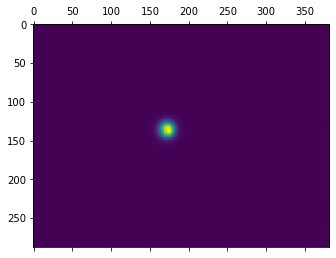

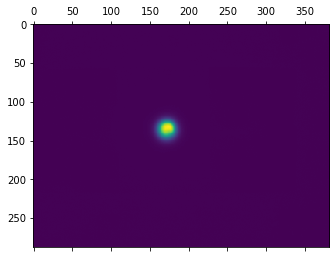

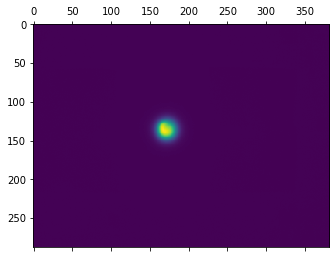

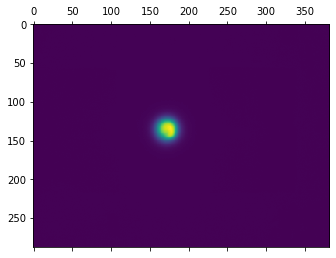

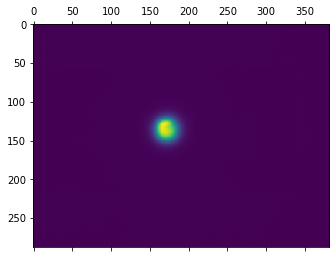

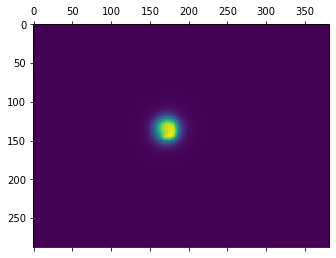

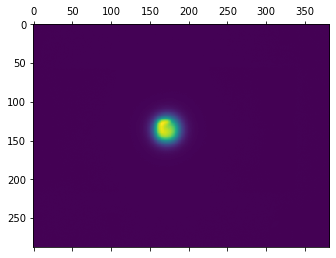

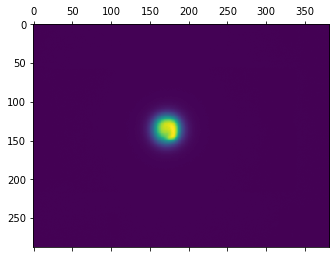

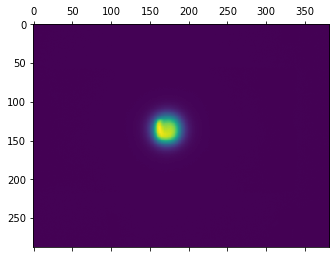

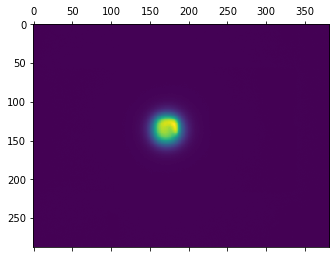

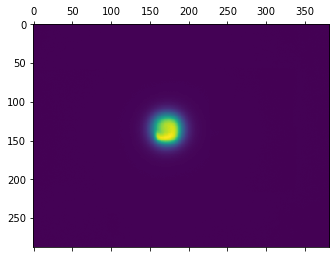

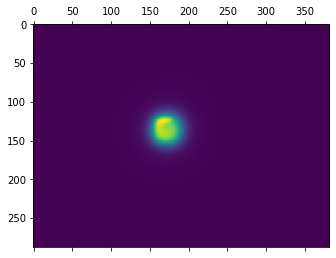

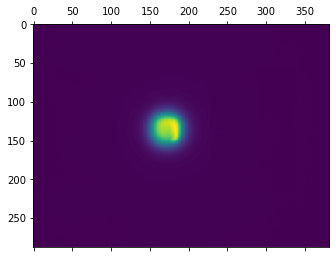

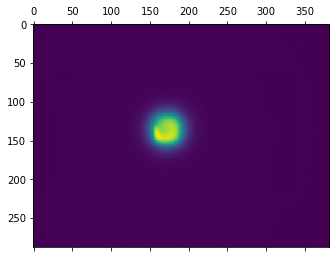

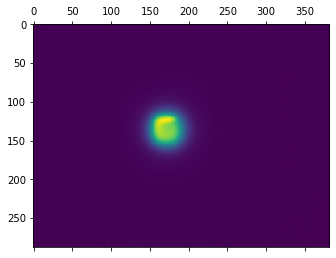

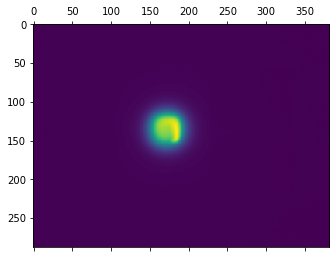

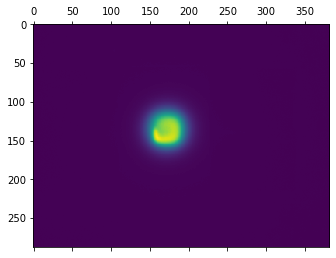

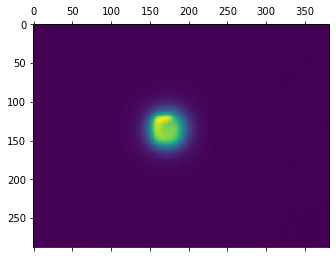

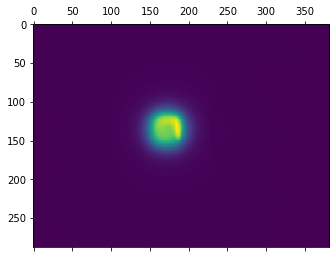

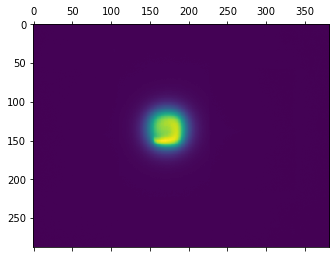

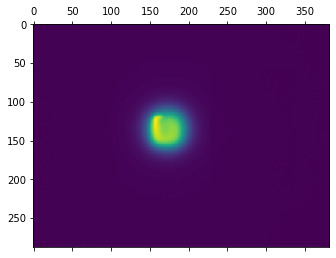

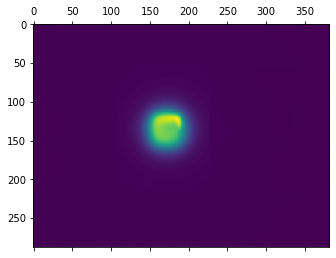

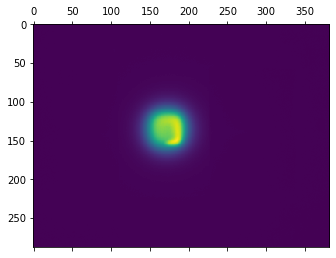

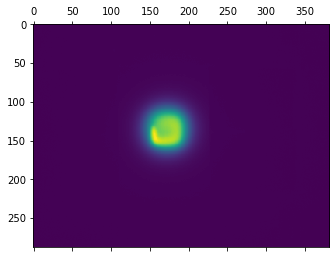

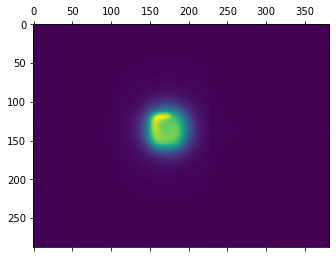

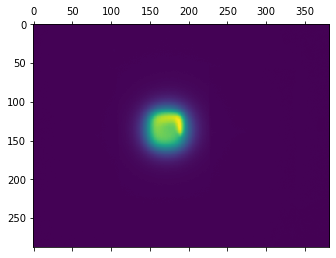

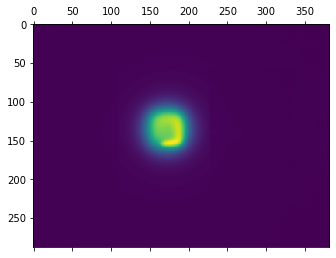

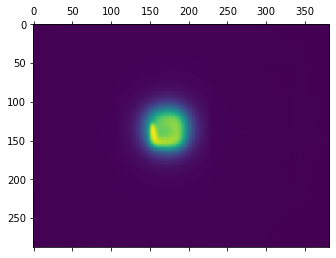

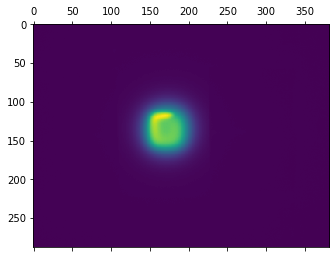

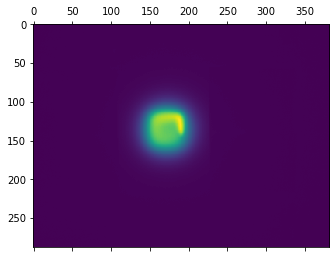

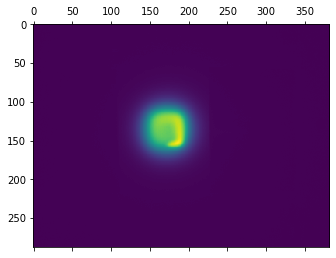

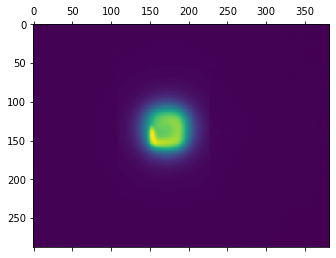

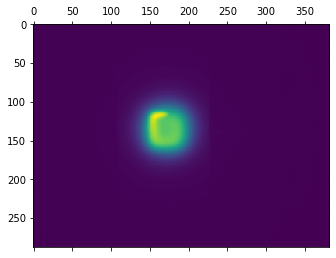

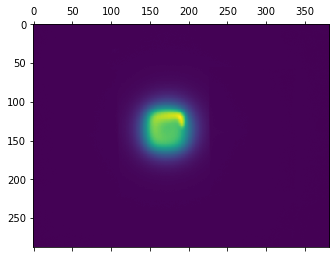

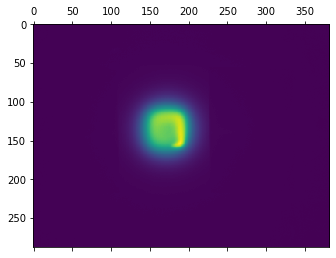

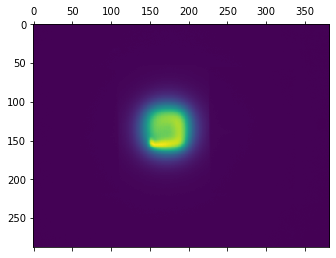

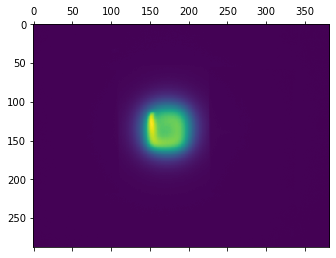

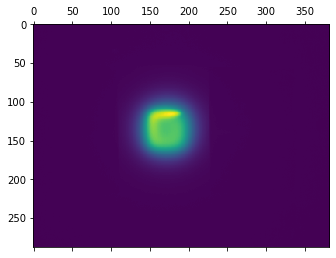

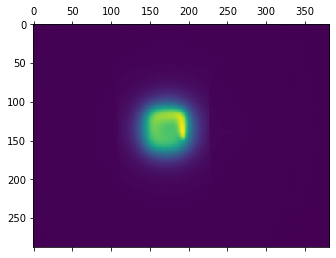

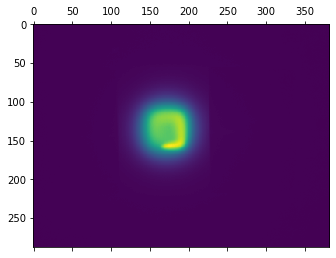

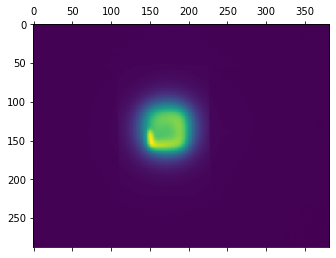

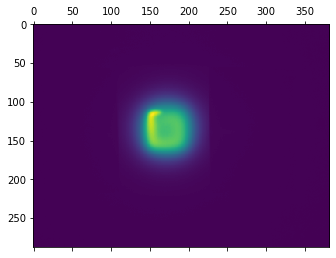

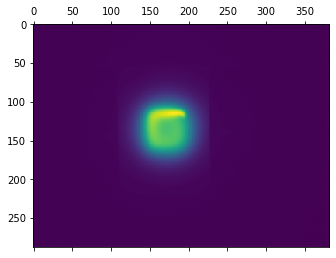

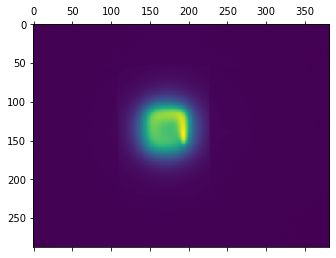

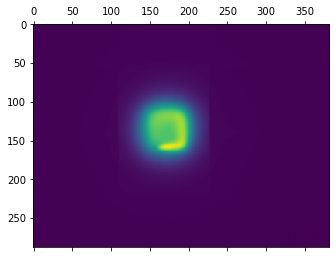

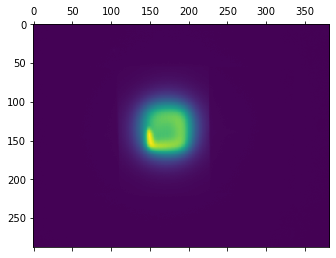

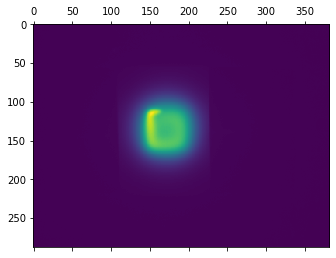

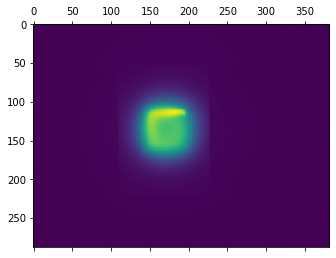

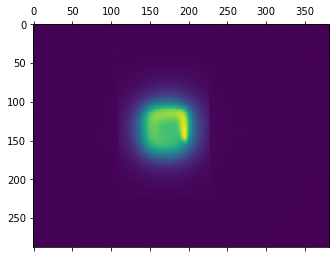

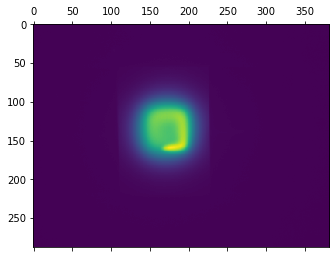

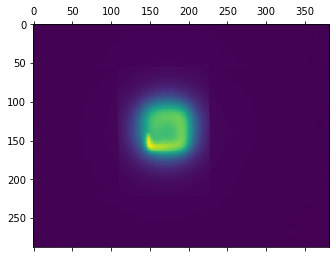

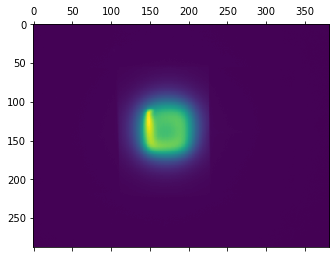

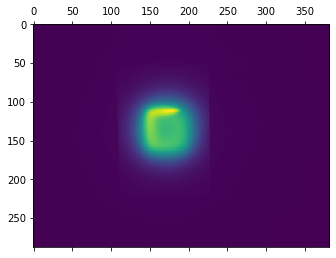

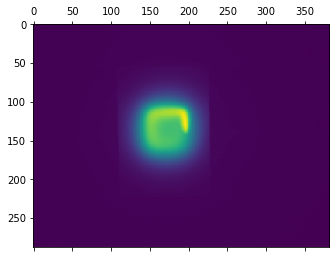

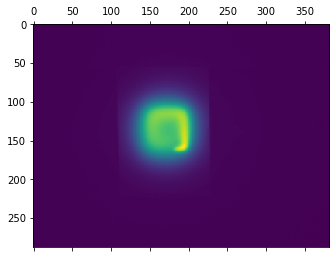

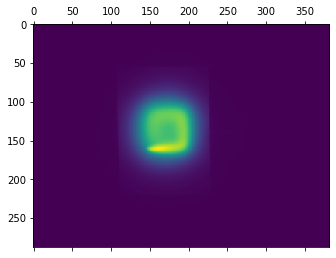

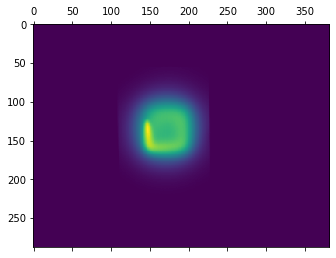

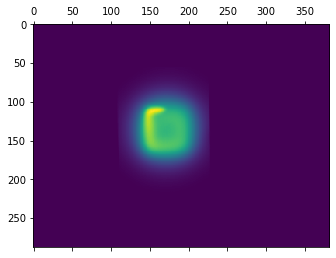

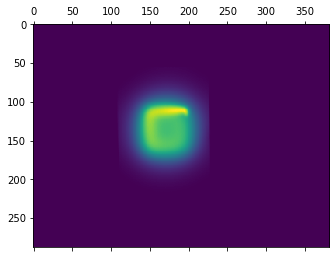

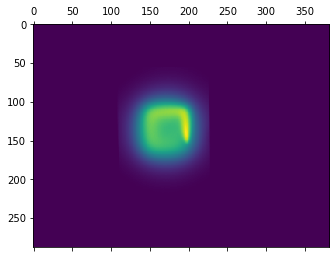

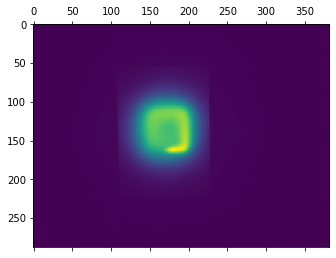

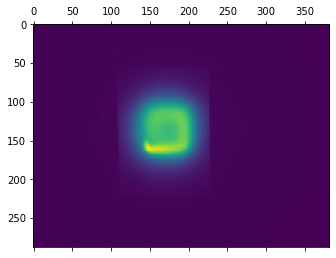

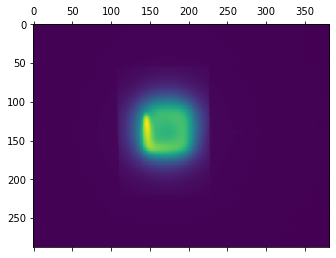

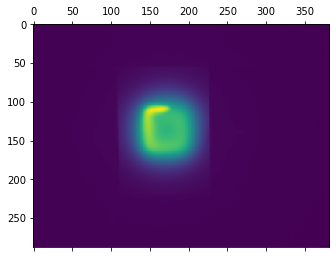

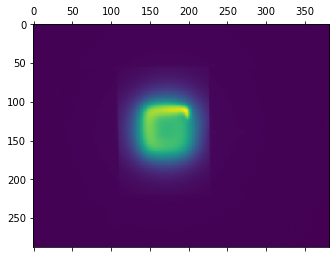

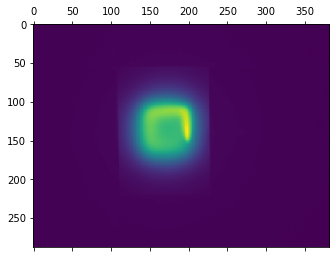

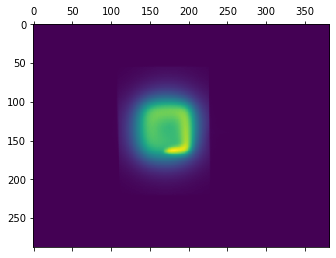

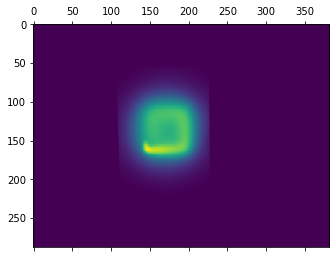

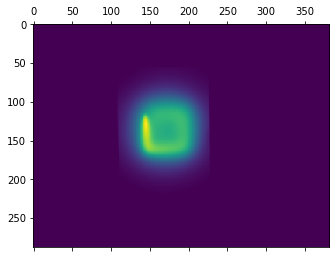

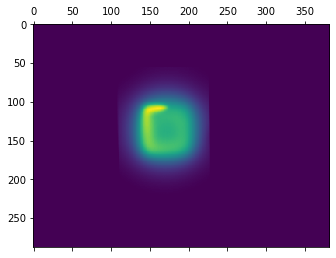

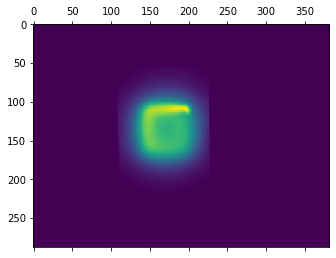

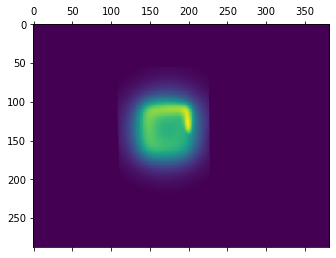

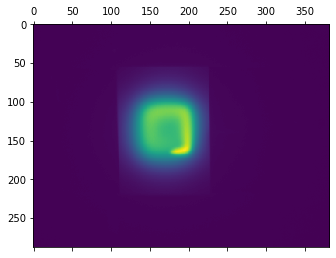

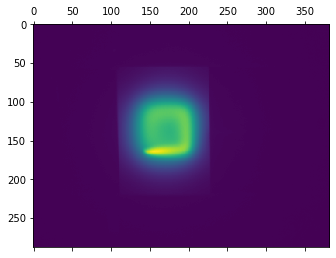

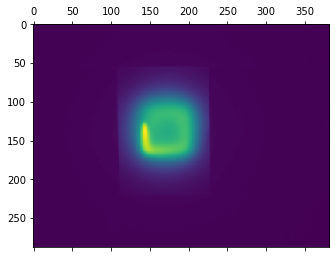

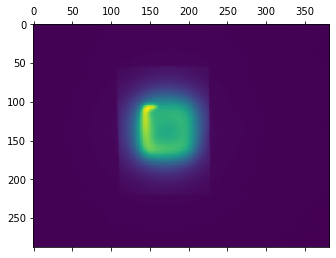

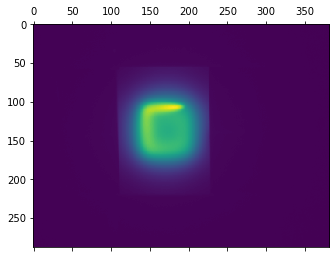

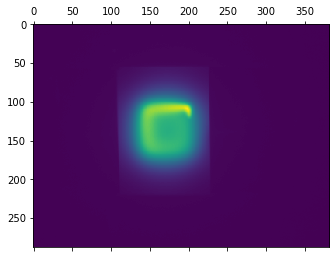

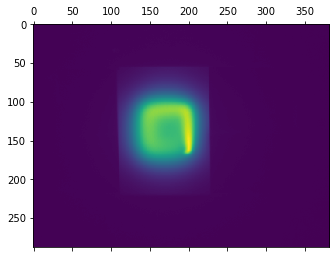

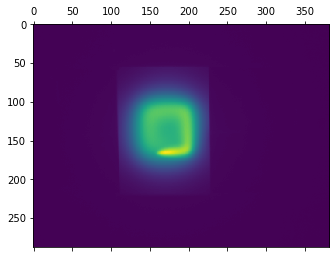

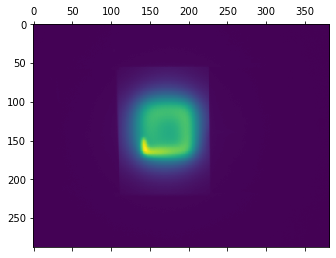

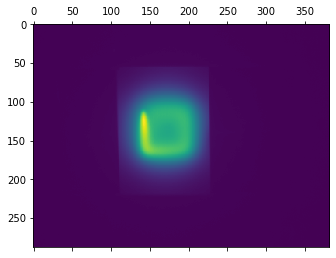

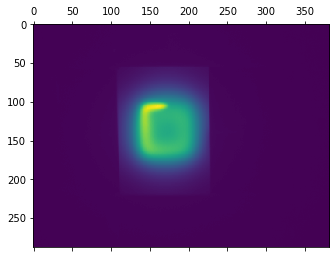

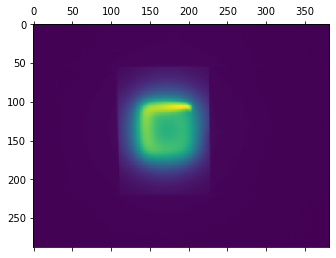

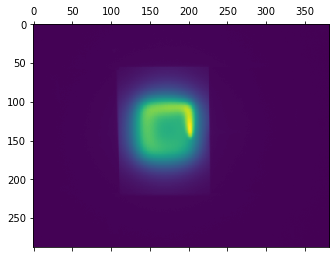

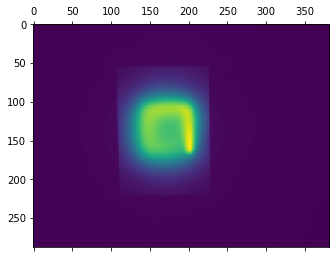

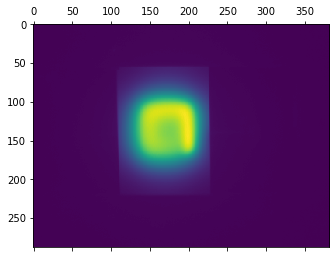

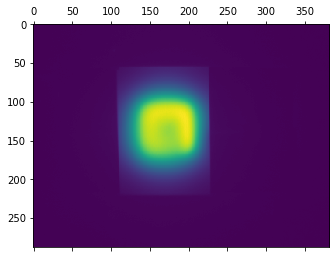

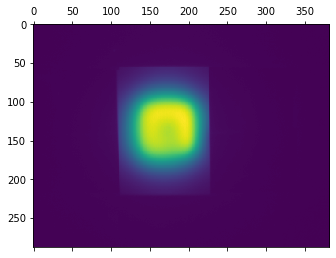

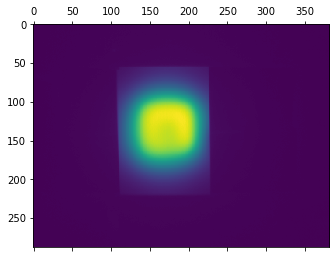

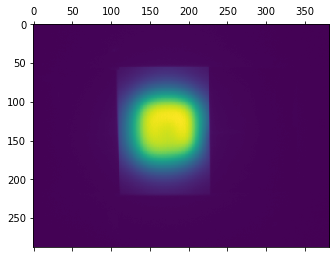

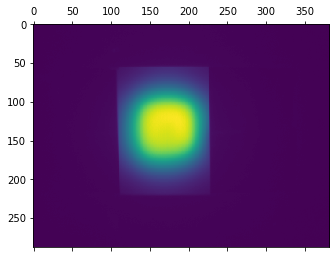

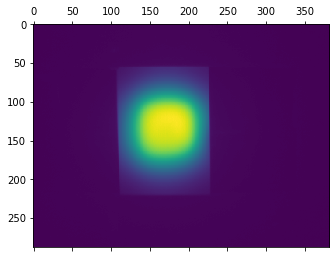

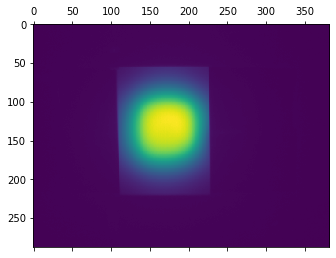

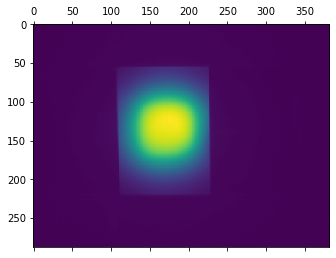

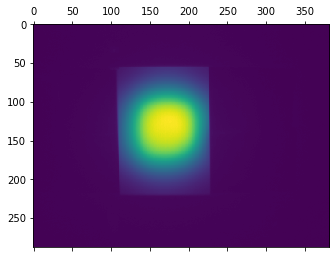

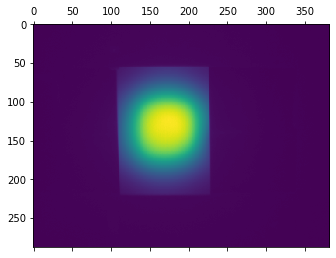

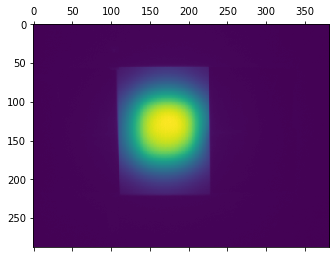

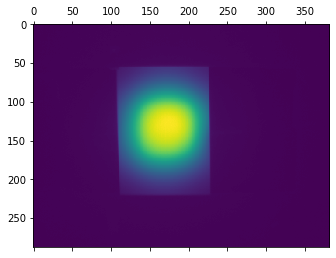

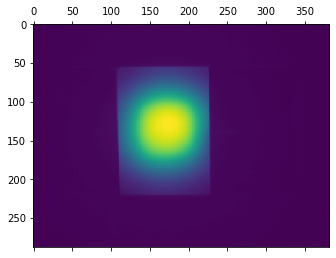

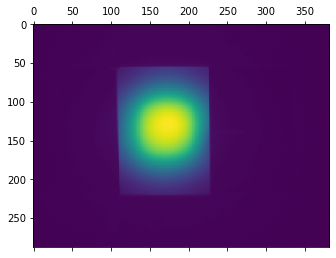

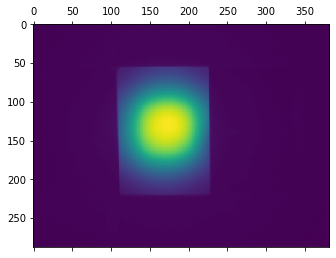

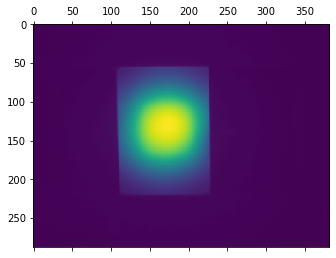

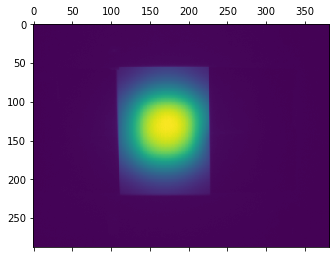

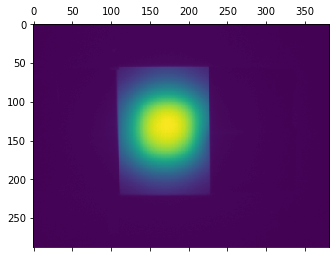

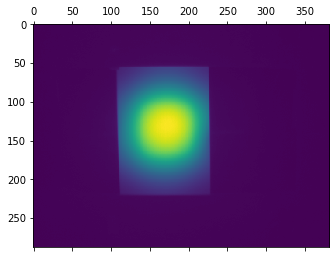

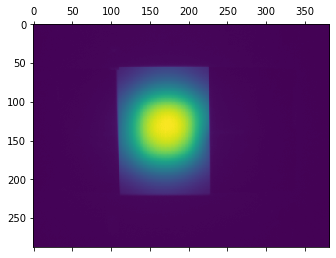

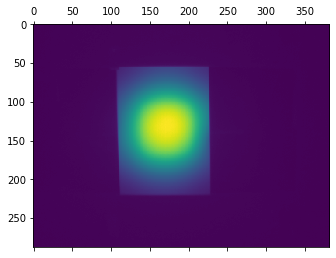

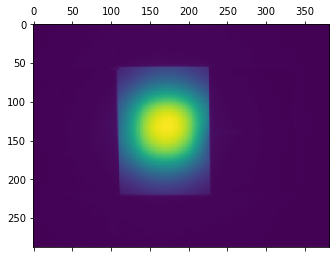

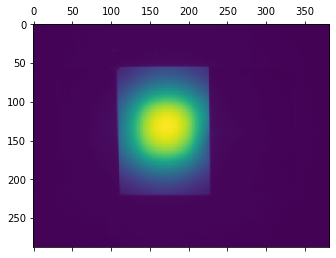

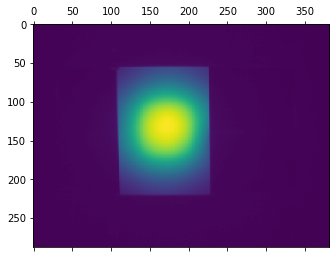

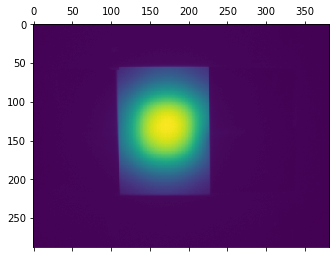

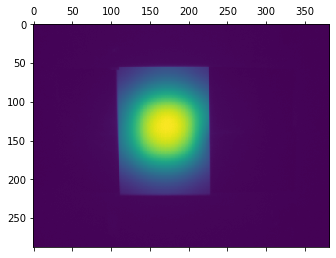

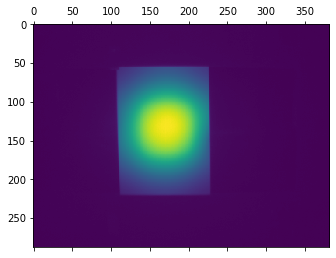

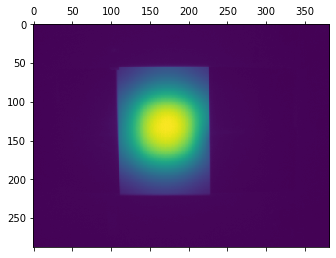

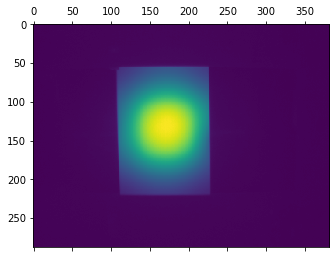

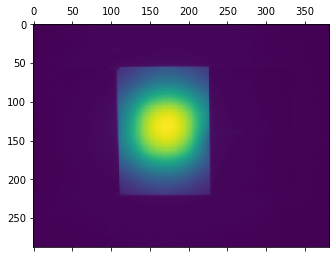

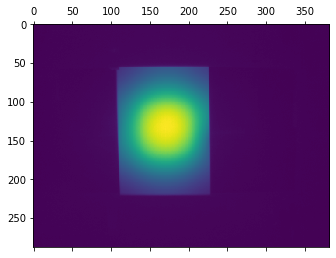

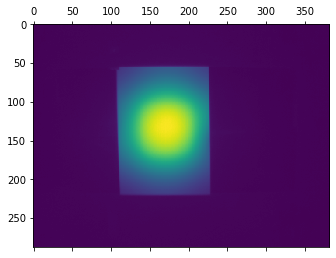

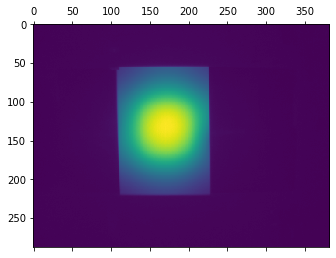

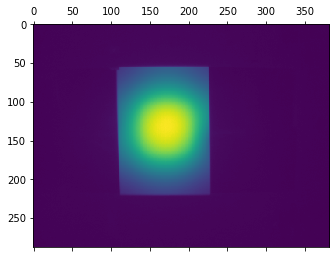

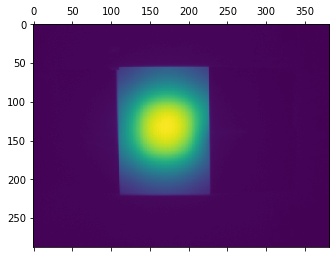

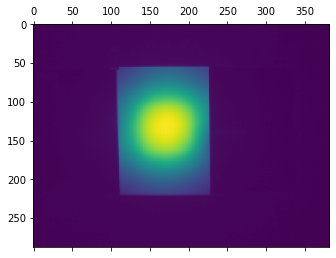

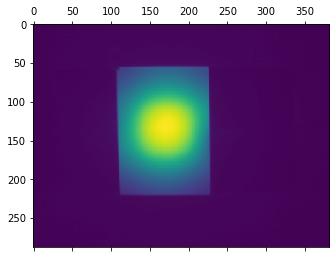

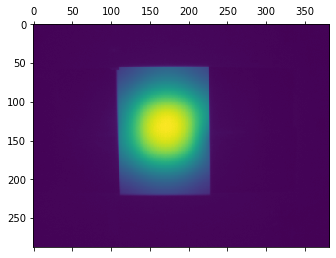

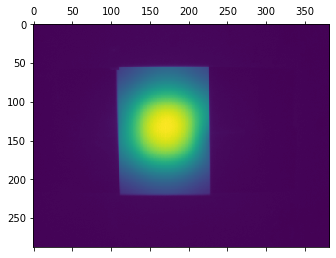

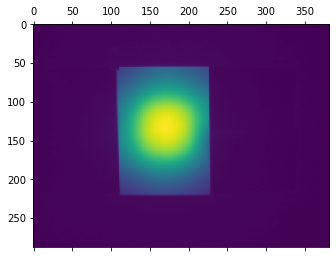

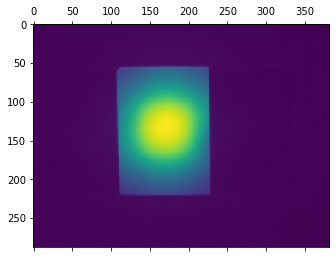

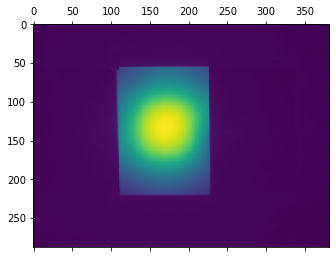

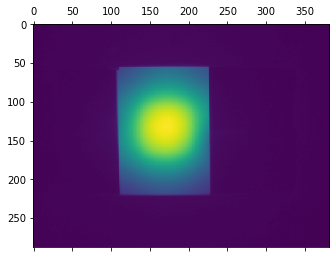

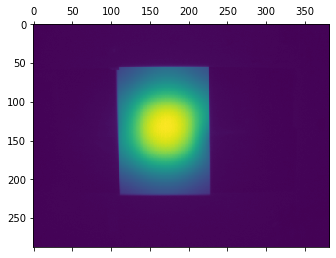

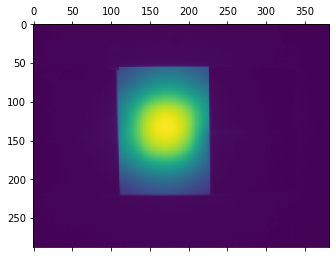

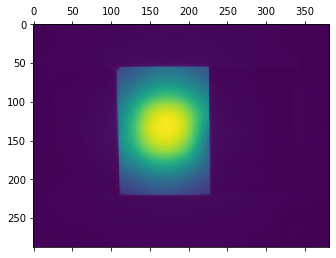

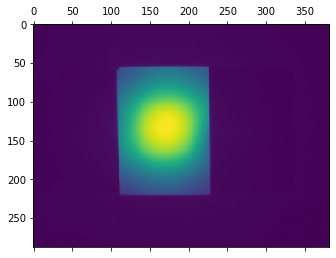

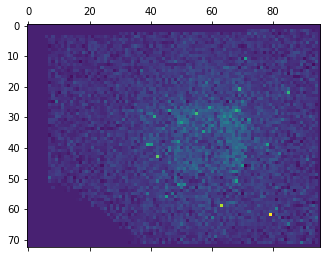

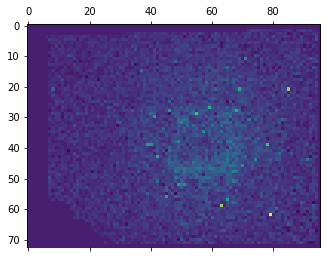

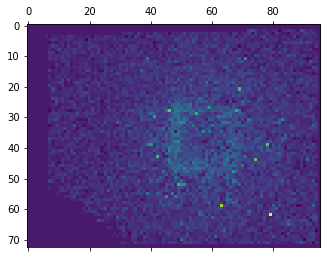

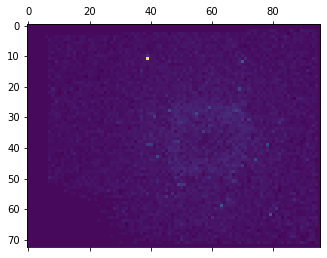

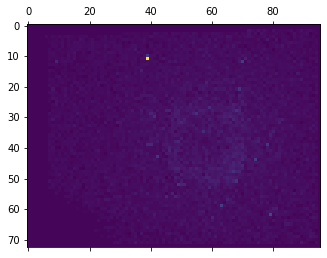

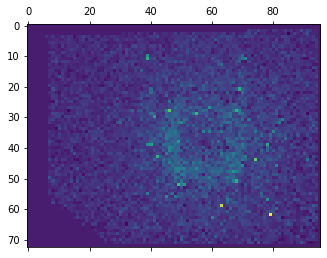

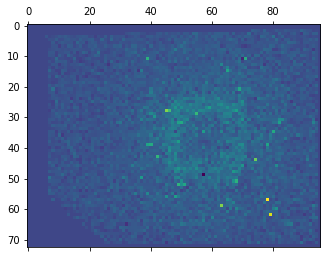

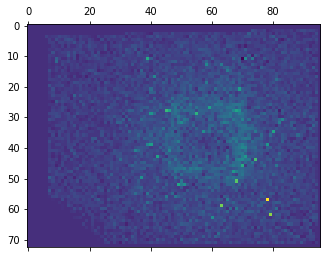

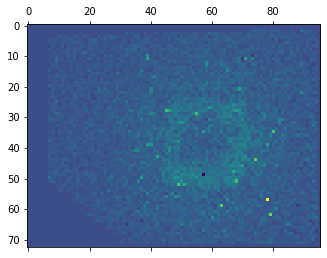

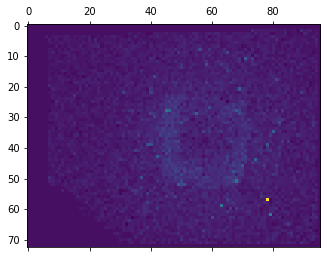

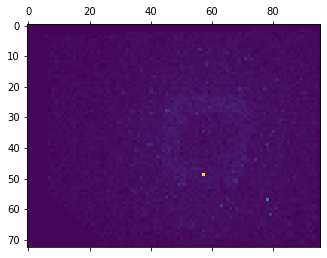

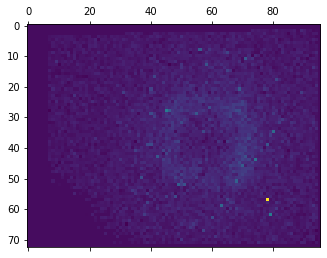

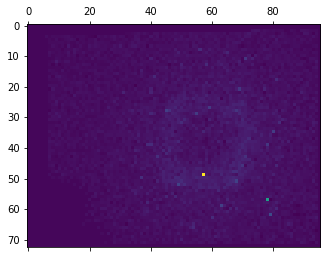

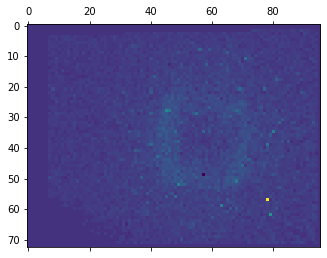

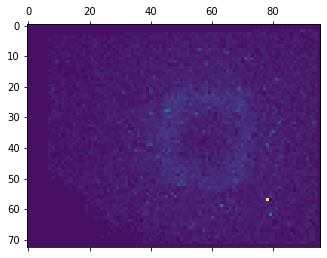

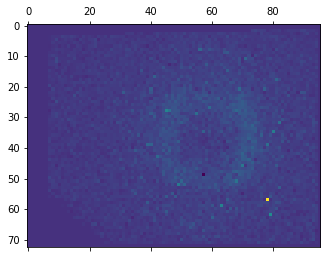

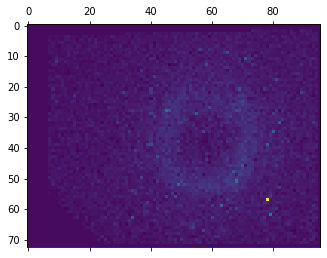

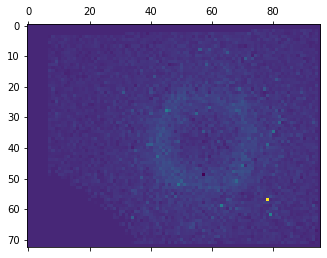

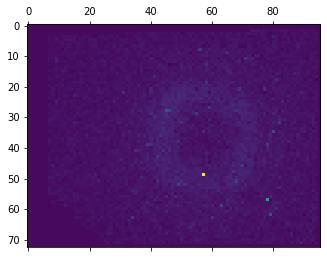

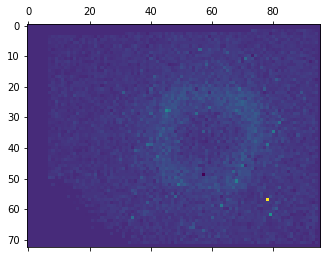

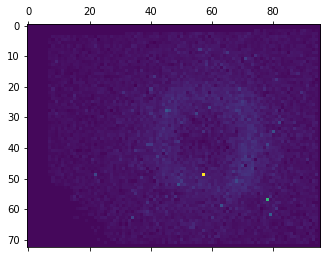

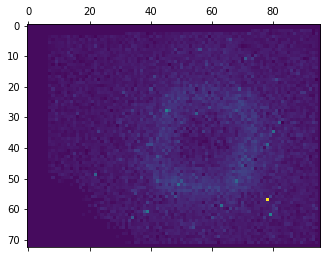

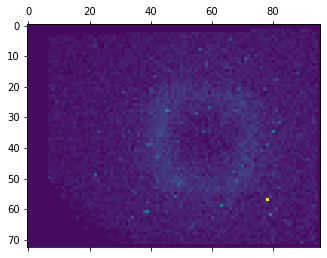

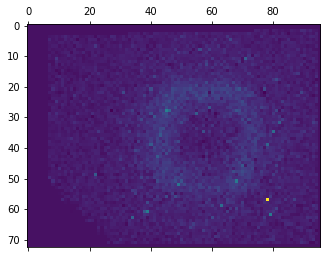

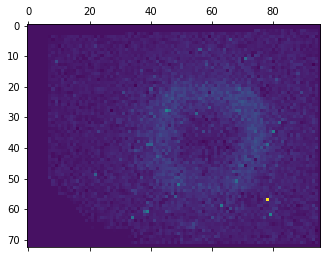

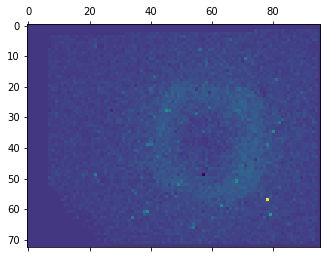

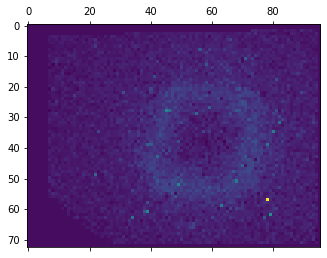

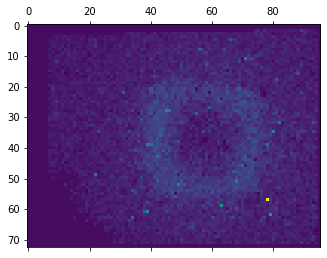

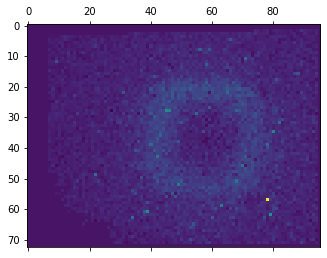

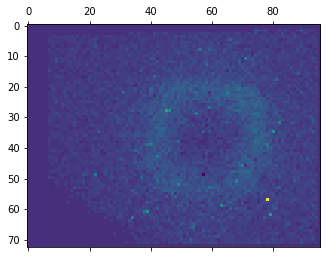

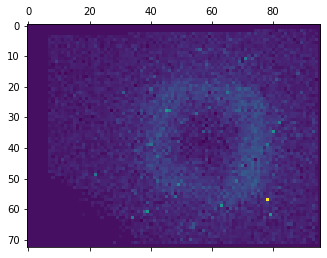

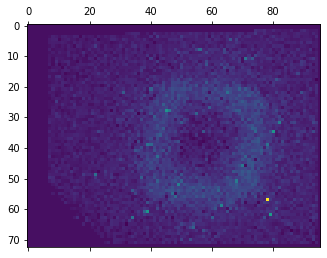

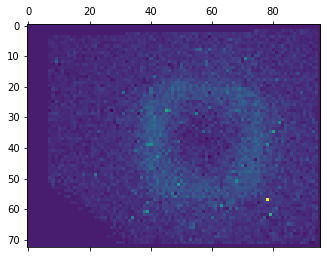

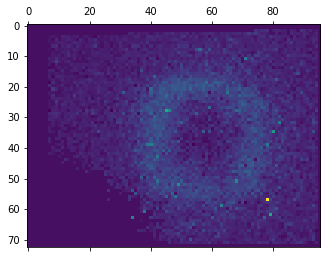

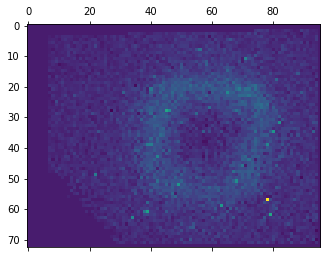

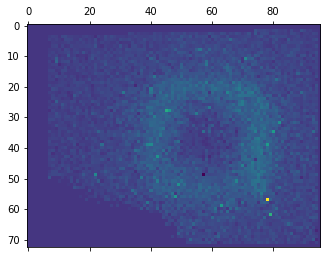

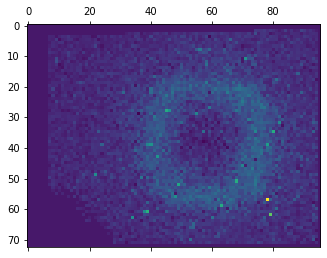

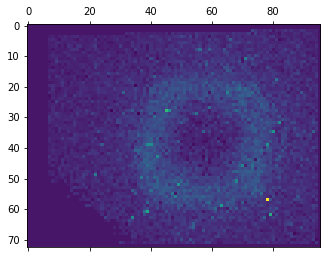

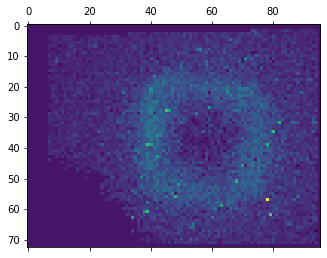

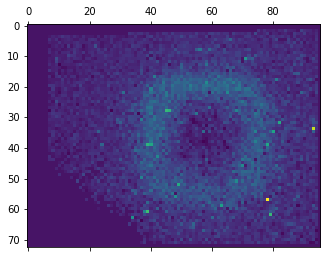

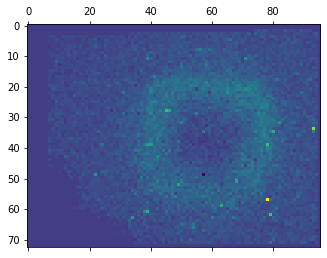

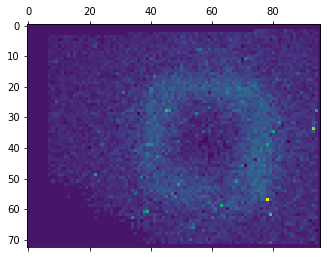

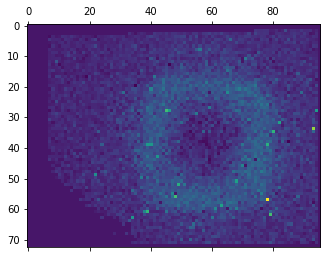

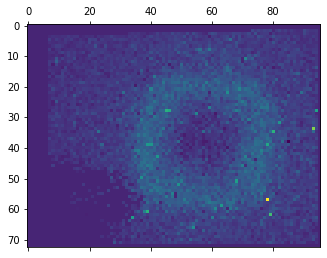

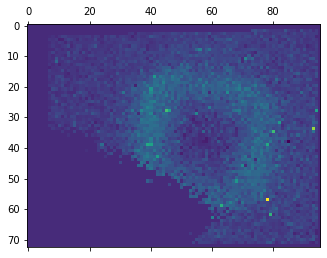

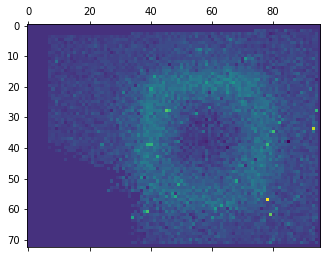

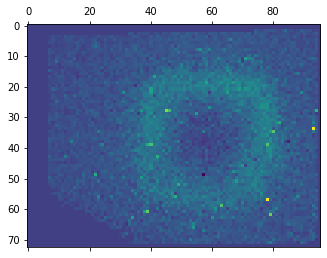

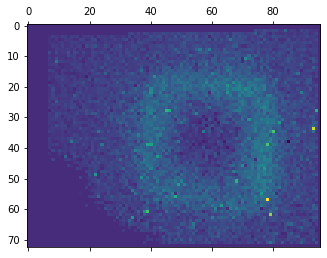

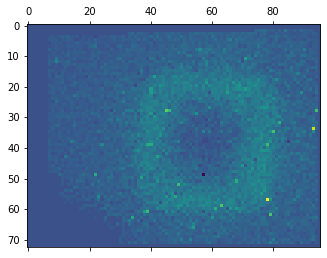

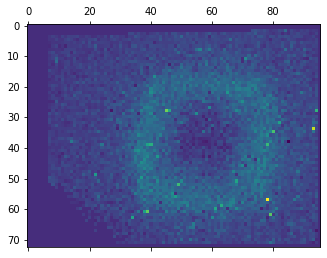

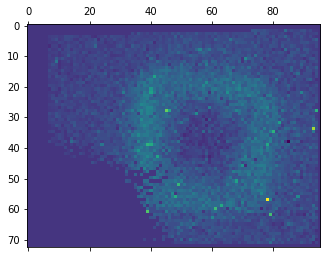

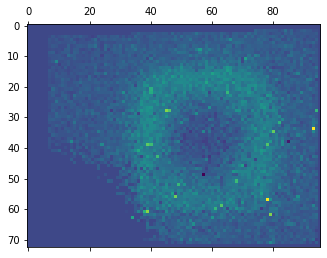

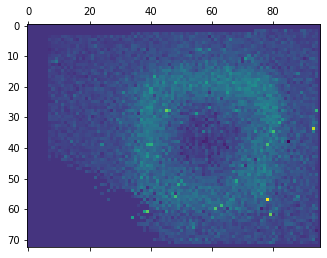

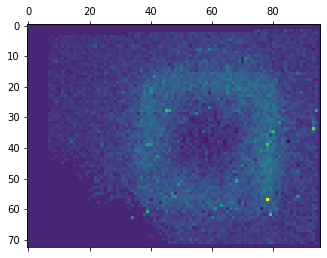

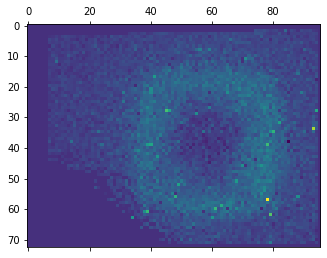

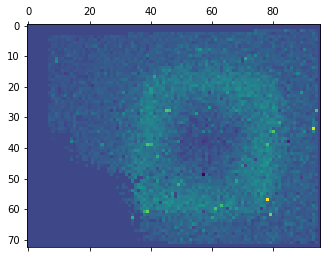

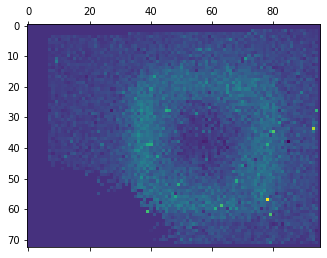

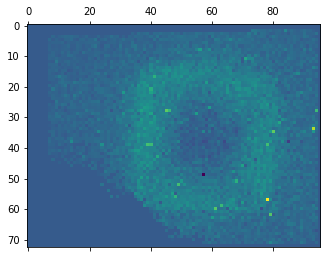

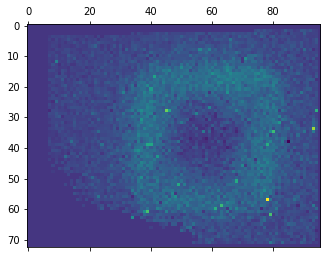

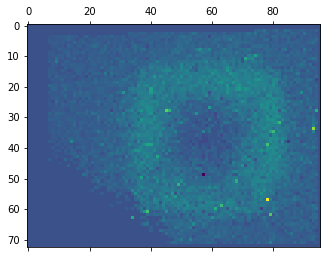

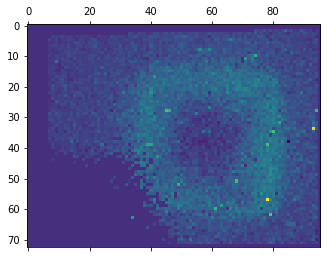

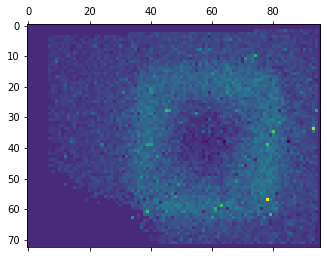

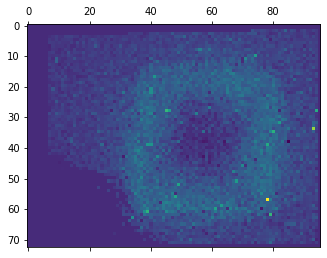

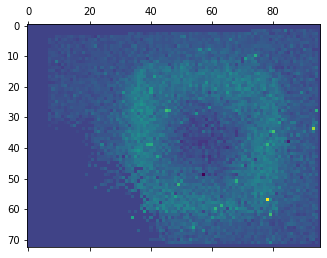

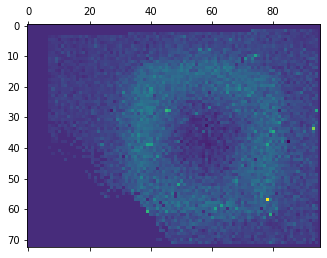

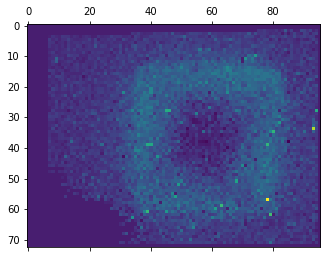

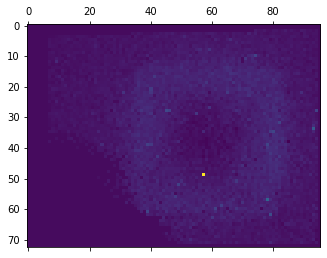

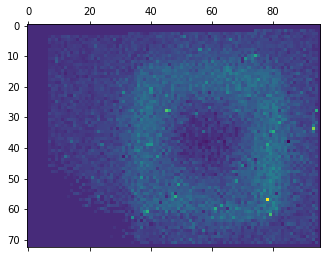

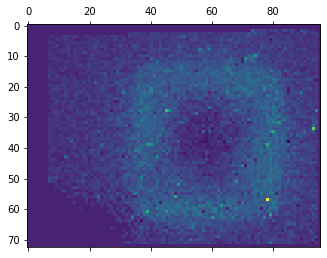

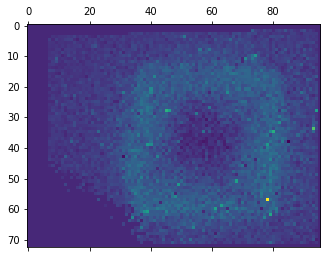

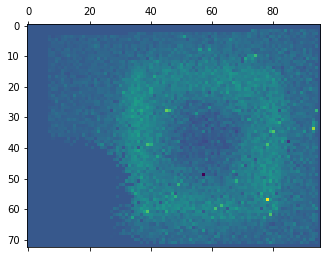

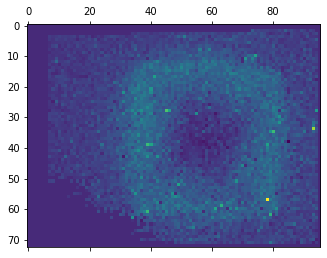

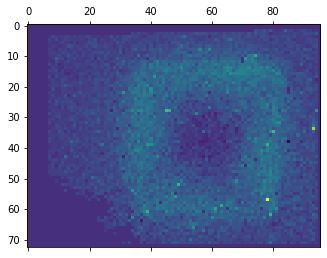

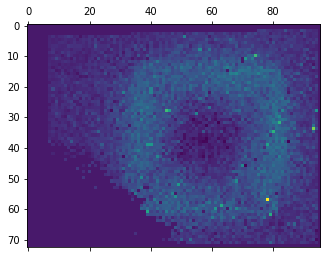

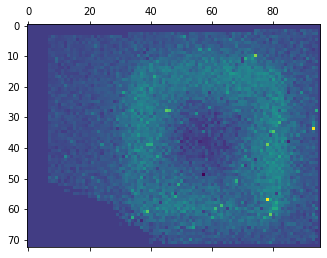

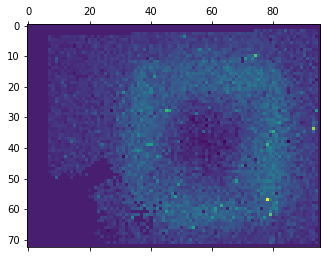

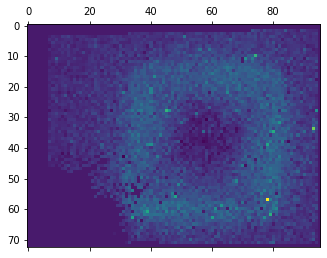

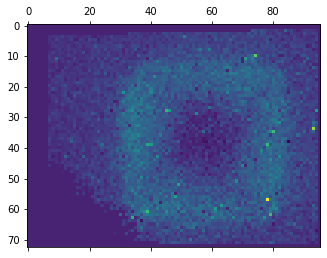

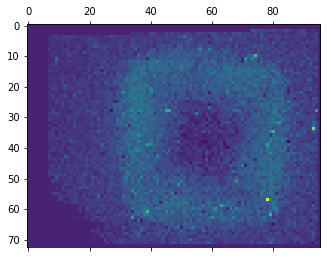

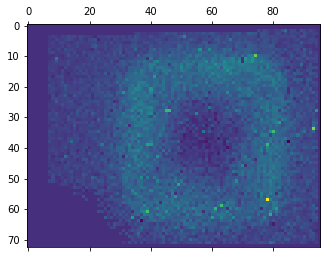

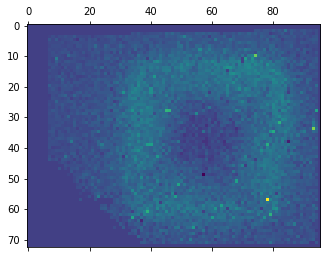

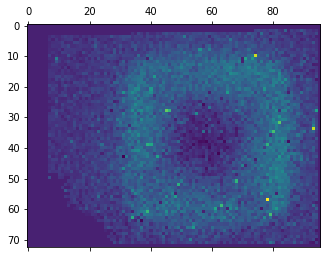

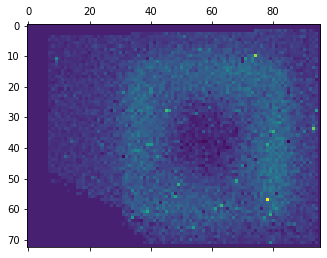

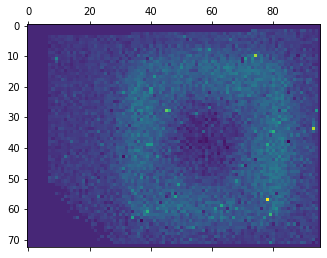

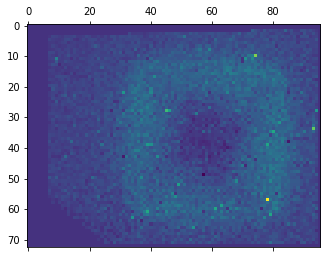

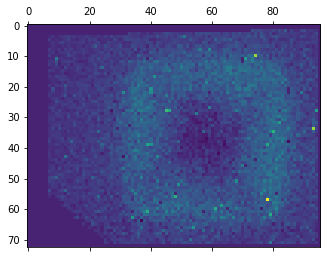

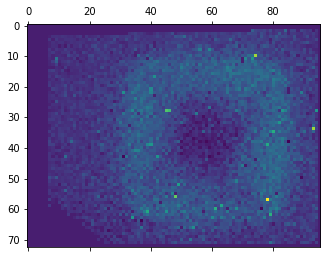

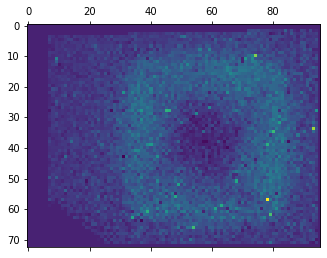

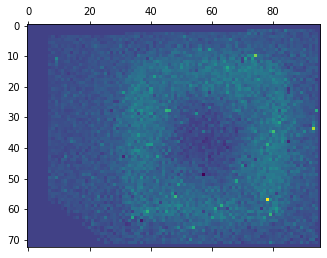

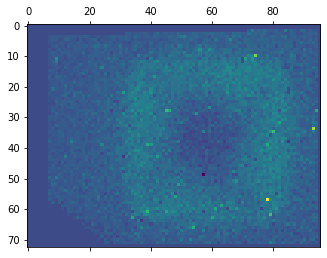

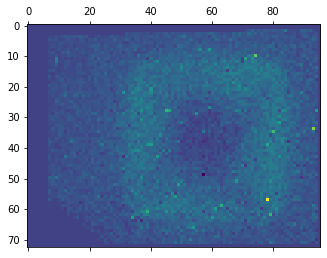

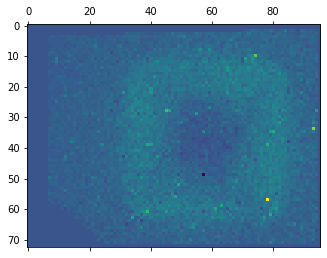

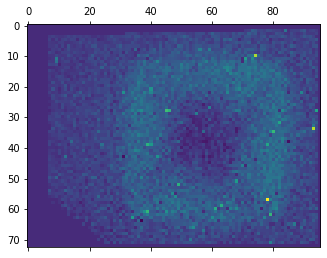

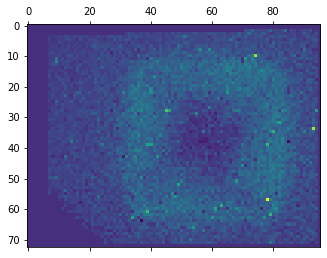

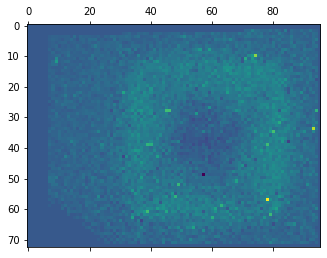

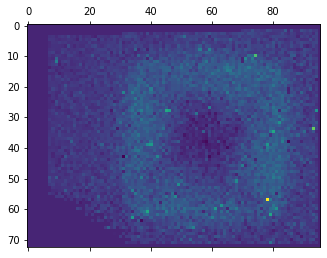

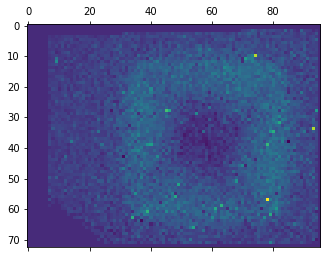

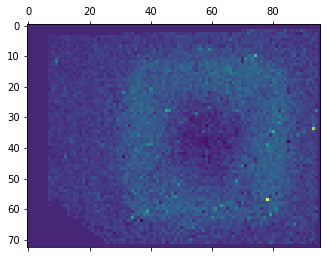

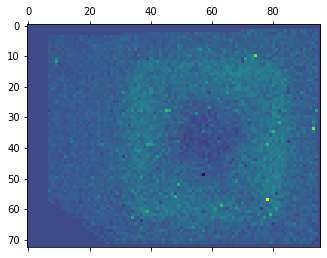

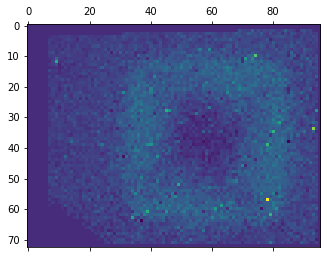

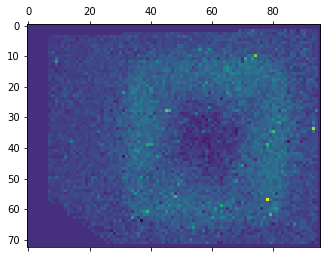

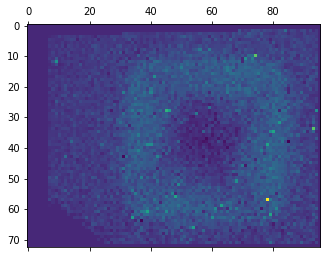

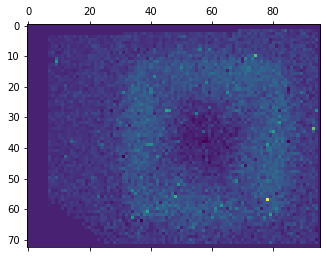

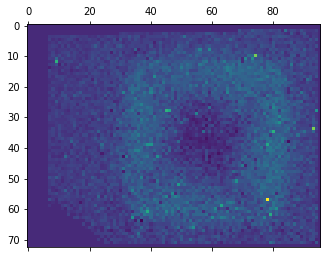

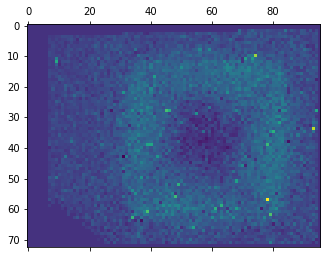

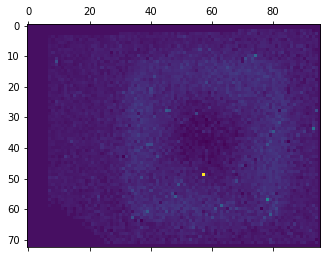

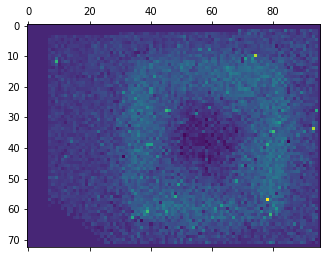

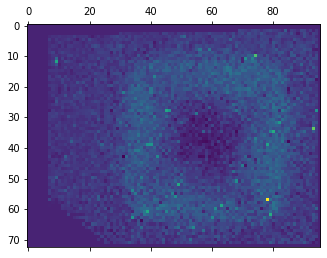

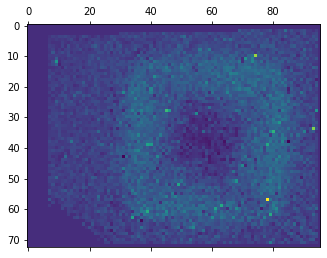

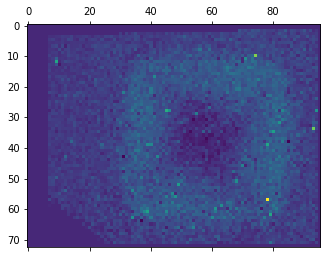

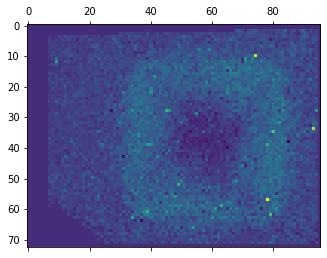

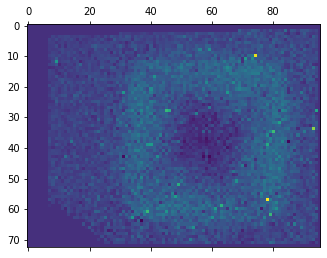

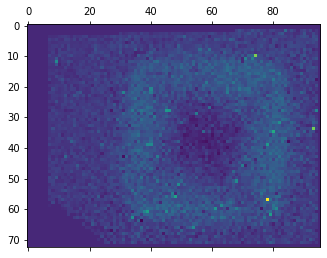

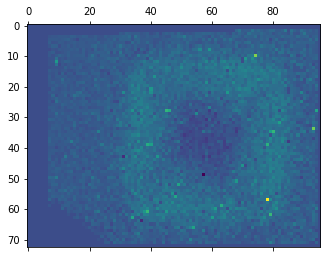

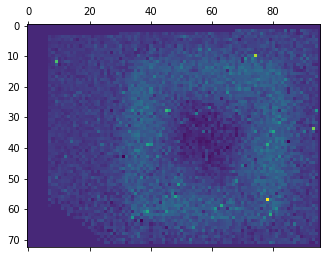

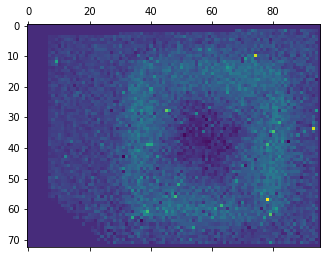

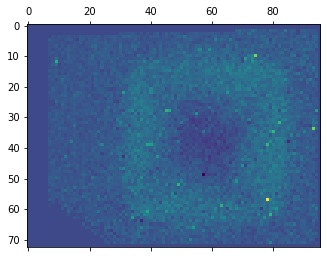

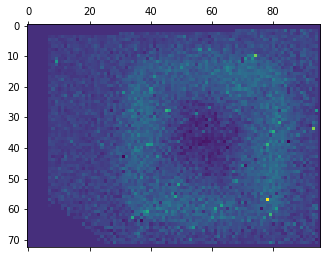

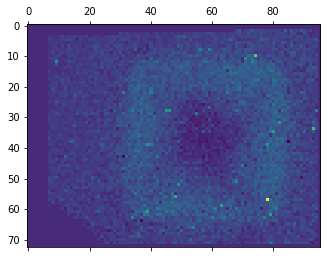

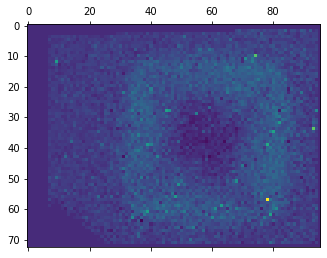

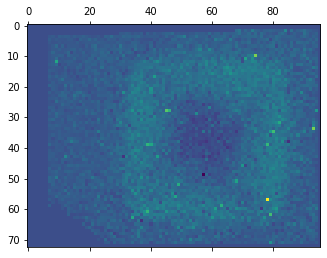

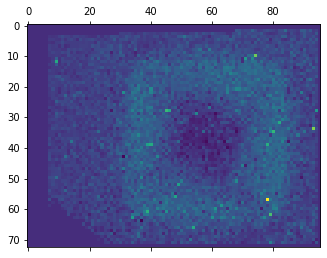

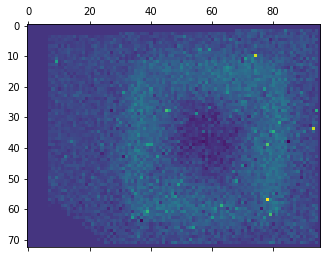

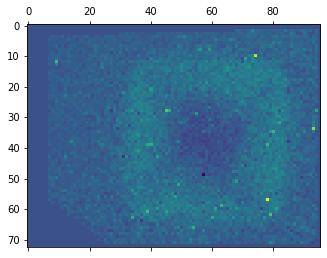

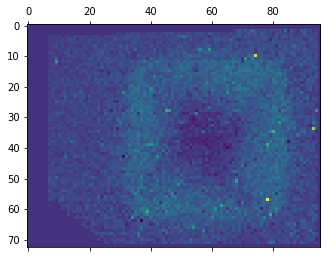

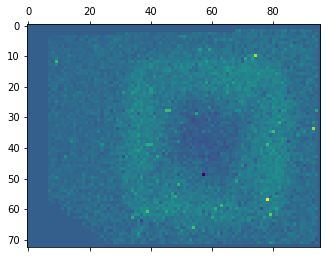

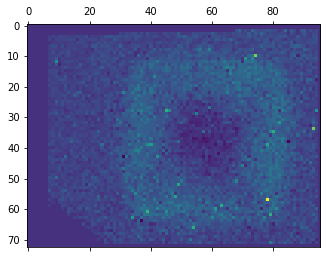

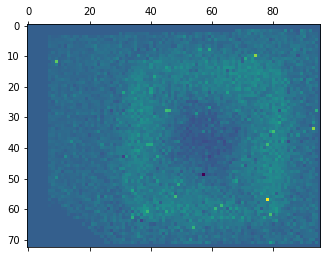

In [76]:
for i in np.arange(163,len(arav.index),30):
    plt.matshow(arav.iloc[i,0][::-1,::-1])
for i in np.arange(163,len(arav.index),10):
    plt.matshow(dfa.iloc[i,:][(      'strains',                   'strain_p1')])
